Используемые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

Загрузка данных

In [2]:
trd = pd.read_csv('train.csv')
tsd = pd.read_csv('test.csv')
td = pd.concat([trd, tsd], ignore_index=True, sort = False)

Пропущенные значения

Text(0.5, 1.0, 'Missing values heatmap')

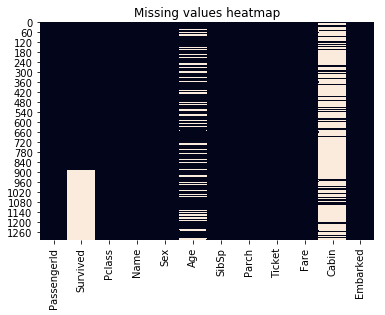

In [3]:
td.isnull().sum()
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")

Категориальные признаки

In [4]:
td.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

Survived

Text(0.5, 1.0, 'Training Data - Percentage of people survived and Deceased')

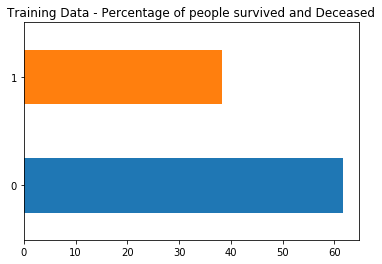

In [5]:
(trd.Survived.value_counts(normalize=True) * 100).plot.barh().set_title("Training Data - Percentage of people survived and Deceased")

Pclass

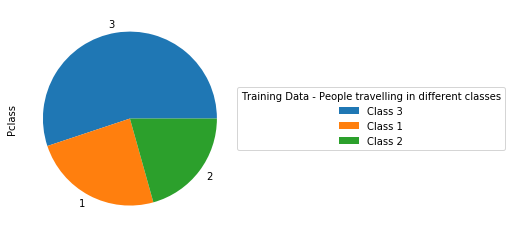

In [6]:
fig_pclass = trd.Pclass.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class 2"], loc='center right', bbox_to_anchor=(2.25, 0.5)).set_title("Training Data - People travelling in different classes")

Sex

Text(0.5, 1.0, 'Training Data - Percentage of people survived on the basis of class')

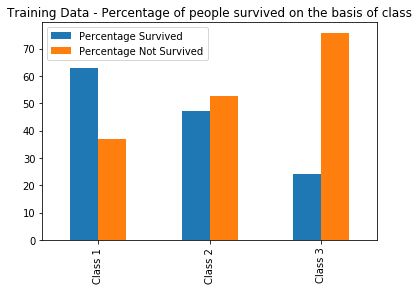

In [7]:
pclass_1_survivor_distribution = round((trd[trd.Pclass == 1].Survived == 1).value_counts()[1]/len(trd[trd.Pclass == 1]) * 100, 2)
pclass_2_survivor_distribution = round((trd[trd.Pclass == 2].Survived == 1).value_counts()[1]/len(trd[trd.Pclass == 2]) * 100, 2)
pclass_3_survivor_distribution = round((trd[trd.Pclass == 3].Survived == 1).value_counts()[1]/len(trd[trd.Pclass == 3]) * 100, 2)
pclass_perc_df = pd.DataFrame(
    { "Percentage Survived":{"Class 1": pclass_1_survivor_distribution,"Class 2": pclass_2_survivor_distribution, "Class 3": pclass_3_survivor_distribution},  
     "Percentage Not Survived":{"Class 1": 100-pclass_1_survivor_distribution,"Class 2": 100-pclass_2_survivor_distribution, "Class 3": 100-pclass_3_survivor_distribution}})
pclass_perc_df.plot.bar().set_title("Training Data - Percentage of people survived on the basis of class")

 Age

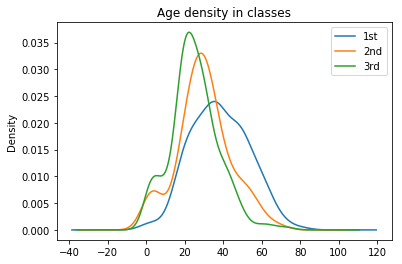

In [8]:
for x in [1,2,3]:    ## for 3 classes
    trd.Age[trd.Pclass == x].plot(kind="kde")
plt.title("Age density in classes")
plt.legend(("1st","2nd","3rd"))

SibSp

In [9]:
for x in ["male","female"]:
    td.Pclass[td.Sex == x].plot(kind="kde")
plt.title("Training Data - Gender density in classes")
plt.legend(("Male","Female"))

 Parch

In [10]:
pclass_perc_df

Percentage Survived  Percentage Not Survived
Class 1                62.96                    37.04
Class 2                47.28                    52.72
Class 3                24.24                    75.76

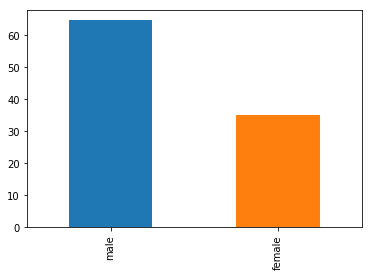

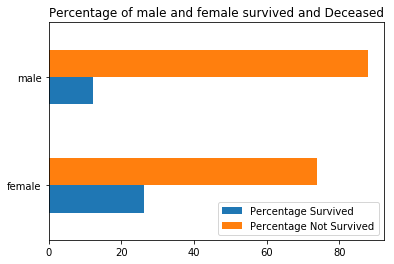

In [11]:
fig_sex = (trd.Sex.value_counts(normalize = True) * 100).plot.bar()
male_pr = round((trd[trd.Sex == 'male'].Survived == 1).value_counts()[1]/len(trd.Sex) * 100, 2)
female_pr = round((trd[trd.Sex == 'female'].Survived == 1).value_counts()[1]/len(trd.Sex) * 100, 2)
sex_perc_df = pd.DataFrame(
    { "Percentage Survived":{"male": male_pr,"female": female_pr},  "Percentage Not Survived":{"male": 100-male_pr,"female": 100-female_pr}})
sex_perc_df.plot.barh().set_title("Percentage of male and female survived and Deceased")
fig_sex

In [12]:
pd.DataFrame(td.Age.describe())

Age
count  1046.000000
mean     29.881138
std      14.413493
min       0.170000
25%      21.000000
50%      28.000000
75%      39.000000
max      80.000000

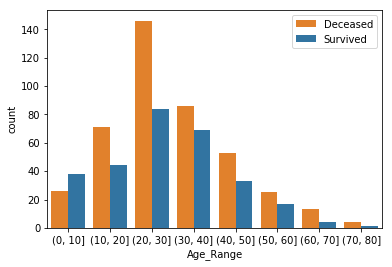

In [13]:
td['Age_Range'] = pd.cut(td.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = td, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])

In [14]:
sns.distplot(td['Age'].dropna(),color='darkred',bins=30)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [15]:
td.SibSp.describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

Text(0.5, 1.0, 'Training Data - Number of siblings or spouses vs survival count')

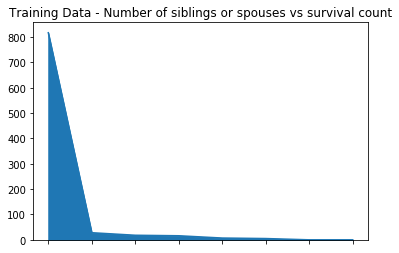

In [16]:
ss = pd.DataFrame()
ss['survived'] = trd.Survived
ss['sibling_spouse'] = pd.cut(trd.SibSp, [0, 1, 2, 3, 4, 5, 6,7,8], include_lowest = True)
(ss.sibling_spouse.value_counts()).plot.area().set_title("Training Data - Number of siblings or spouses vs survival count")

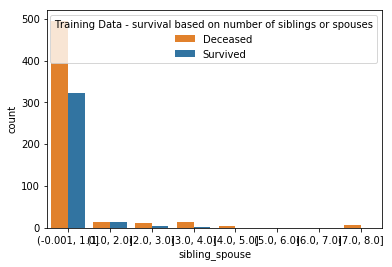

In [17]:
x = sns.countplot(x = "sibling_spouse", hue = "survived", data = ss, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Training Data - survival based on number of siblings or spouses")

In [18]:
pd.DataFrame(td.Parch.describe())

Parch
count  1309.000000
mean      0.385027
std       0.865560
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       9.000000

In [19]:
pc = pd.DataFrame()
pc['survived'] = trd.Survived
pc['parents_children'] = pd.cut(trd.Parch, [0, 1, 2, 3, 4, 5, 6], include_lowest = True)
(pc.parents_children.value_counts()).plot.area().set_title("Training Data - Number of parents/children and survival density")

Text(0.5, 1.0, 'Training Data - Number of parents/children and survival density')

In [20]:
x = sns.countplot(x = "parents_children", hue = "survived", data = pc, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Training Data - Survival based on number of parents/children")

In [21]:
td['Family'] = td.Parch + td.SibSp
td['Is_Alone'] = td.Family == 0

In [22]:
td.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [23]:
td['Fare_Category'] = pd.cut(td['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid',
                                                                                      'High_Mid','High'])

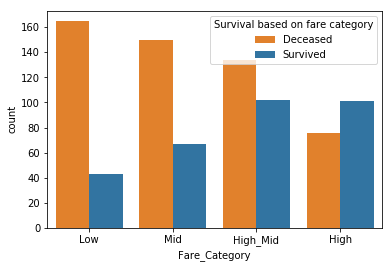

In [24]:
x = sns.countplot(x = "Fare_Category", hue = "Survived", data = td, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Survival based on fare category")

Text(0.5, 1.0, 'Training Data - Survival based on embarking point.')

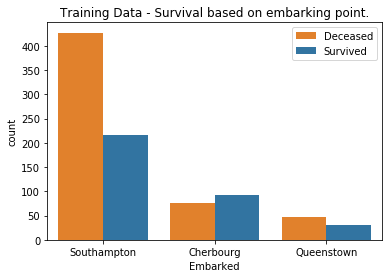

In [25]:
p = sns.countplot(x = "Embarked", hue = "Survived", data = trd, palette=["C1", "C0"])
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.legend(labels = ["Deceased", "Survived"])
p.set_title("Training Data - Survival based on embarking point.")

In [26]:
td.Embarked.fillna(td.Embarked.mode()[0], inplace = True)

In [27]:
td['Salutation'] = td.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) 
td.Salutation.nunique()

18

In [28]:
grp = td.groupby(['Sex', 'Pclass'])

In [29]:
grp.Age.apply(lambda x: x.fillna(x.median()))
td.Age.fillna(td.Age.median, inplace = True)

In [30]:
td['Sex'] = LabelEncoder().fit_transform(td['Sex'])

In [31]:
pd.get_dummies(td.Embarked, prefix="Emb", drop_first = True)

Emb_Q  Emb_S
0         0      1
1         0      0
2         0      1
3         0      1
4         0      1
5         1      0
6         0      1
7         0      1
8         0      1
9         0      0
10        0      1
11        0      1
12        0      1
13        0      1
14        0      1
15        0      1
16        1      0
17        0      1
18        0      1
19        0      0
20        0      1
21        0      1
22        1      0
23        0      1
24        0      1
25        0      1
26        0      0
27        0      1
28        1      0
29        0      1
...     ...    ...
1279      1      0
1280      0      1
1281      0      1
1282      0      1
1283      0      1
1284      0      1
1285      0      1
1286      0      1
1287      1      0
1288      0      0
1289      0      1
1290      1      0
1291      0      1
1292      0      1
1293      0      0
1294      0      1
1295      0      0
1296      0      0
1297      0      1
1298      0      0
1299      1      0
1300      0      1
1301      1      0
1302      1      0
1303      0      1
1304      0      1
1305      0      0
1306      0      1
1307      0      1
1308      0      0

[1309 rows x 2 columns]

In [32]:
td.drop(['Pclass', 'Fare','Cabin', 'Fare_Category','Name','Salutation', 'Ticket','Embarked', 'Age_Range', 'SibSp', 'Parch', 'Age'], axis=1, inplace=True)

In [33]:
# Data to be predicted
X_to_be_predicted = td[td.Survived.isnull()]
X_to_be_predicted = X_to_be_predicted.drop(['Survived'], axis = 1)

#Training data
train_data = td
train_data = train_data.dropna()
feature_train = train_data['Survived']
label_train  = train_data.drop(['Survived'], axis = 1)
train_data.shape #891 x 28

##Gaussian
clf = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("NB Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for GNB is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for NB', y=1.05, size=15)

NB Accuracy: 74.86%
The cross validated score for GNB is: 80.76


Text(0.5, 1.05, 'Confusion_matrix for NB')

RF Accuracy: 73.18%
The cross validated score for Random forest is: 75.15


Text(0.5, 1.05, 'Confusion_matrix for RF')

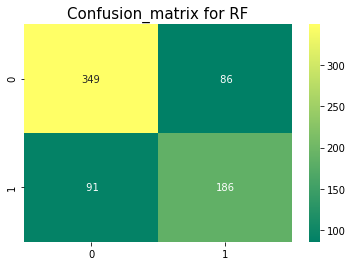

In [34]:
##Random forest
clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for RF', y=1.05, size=15)

In [35]:
result = clf.predict(X_to_be_predicted)
submission = pd.DataFrame({'PassengerId':X_to_be_predicted.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Titanic Predictions.csv


In [36]:
pd.DataFrame({'PassengerId':X_to_be_predicted.PassengerId,'Survived':result})

PassengerId  Survived
891           892       0.0
892           893       1.0
893           894       0.0
894           895       0.0
895           896       0.0
896           897       0.0
897           898       1.0
898           899       1.0
899           900       1.0
900           901       1.0
901           902       0.0
902           903       0.0
903           904       1.0
904           905       0.0
905           906       1.0
906           907       1.0
907           908       0.0
908           909       0.0
909           910       1.0
910           911       1.0
911           912       0.0
912           913       0.0
913           914       1.0
914           915       0.0
915           916       0.0
916           917       0.0
917           918       1.0
918           919       0.0
919           920       0.0
920           921       1.0
...           ...       ...
1279         1280       0.0
1280         1281       0.0
1281         1282       0.0
1282         1283       1.0
1283         1284       1.0
1284         1285       0.0
1285         1286       0.0
1286         1287       1.0
1287         1288       0.0
1288         1289       0.0
1289         1290       0.0
1290         1291       0.0
1291         1292       1.0
1292         1293       0.0
1293         1294       1.0
1294         1295       0.0
1295         1296       0.0
1296         1297       0.0
1297         1298       0.0
1298         1299       1.0
1299         1300       1.0
1300         1301       0.0
1301         1302       1.0
1302         1303       1.0
1303         1304       1.0
1304         1305       0.0
1305         1306       1.0
1306         1307       0.0
1307         1308       0.0
1308         1309       1.0

[418 rows x 2 columns]

In [41]:
filename = 'Titanic Predictions.csv'
submission.to_csv('filename', index=False)
print('Saved file: ' + filename)

Saved file: Titanic Predictions.csv
